**Problem  1.** Starting from $\texttt{x = 1}$, repeatedly set $\texttt{x = x/2}$. Record the last $\texttt{x}$ for which $\texttt{1+x > 1}$. Compare this with the machine epsilon $\texttt{eps}$

**Solution:**

In [ ]:
#initialize x
x = 1

#running while loop
while x +1 > 1:
   x_last = x
   x = x/2

print(f"last x is {x_last}")

last x is 2.220446049250313e-16


In [ ]:

import numpy as np
#typecasting a float64(double precision number) number x into float32(single precision number)
x = 1
x_s = np.float32(x)

#running while loop
while x_s +1 > 1:
   x_last_s = x_s
   x_s = x_s/2

print(x_last_s)

1.1920929e-07


Based from the numerical machine calculation, if $\texttt{x}$ is not set to a customized precision (e.g. $\texttt{single}$ or $\texttt{double}$ precision) then by default, python sets the calculation precision to $\texttt{double}$

In [ ]:
#machine epsilon, eps
np.finfo(x_last).eps

np.float64(2.220446049250313e-16)

The machine $\texttt{eps}$ is equal to the last $\texttt{x}$ for which $\texttt{1+x > 1}$

In $\texttt{Matlab}$, the function $\texttt{eps(x)}$ gives distance between $\texttt{x}$ the nearest larger neighbor of $\texttt{x}$. In $\texttt{python}$, the $\texttt{numpy}$ library has $\texttt{numpy.finfo().eps}$ that gives the nearest larger neighbor of $\texttt{x}$

**Problem 2.** Let $f(x) = \frac{1-\cos(x)}{x^2}$

**(a)** Evaluate $x = 10^{-1}, 10^{-2}, 10^{-3}, ..., 10^{-8}$

**Solution:**

In [ ]:

def f(x):
  f = (1 - np.cos(x))/(x**2)
  return f

#returns values of f(x) for x = 10^-1, ..., 10^-8
for x in range(1,9):

  print(f"When x is {10**-x} then f(x) is {f(10**(-x))}")

When x is 0.1 then f(x) is 0.49958347219741783
When x is 0.01 then f(x) is 0.4999958333473664
When x is 0.001 then f(x) is 0.49999995832550326
When x is 0.0001 then f(x) is 0.4999999969612645
When x is 1e-05 then f(x) is 0.5000000413701854
When x is 1e-06 then f(x) is 0.5000444502911705
When x is 1e-07 then f(x) is 0.4996003610813205
When x is 1e-08 then f(x) is 0.0


**(b)** Compare with $\lim_{x\to 0}f(x) = \frac{1}{2}$. Describe the accuracy trend as $x$ decreases

**Solution:** Since the values of x values and y values are very very small. I just scaled the x- and y- axis into log scale to precisely observe the behaviour of the forward error.
$$ $$
Based from the log-scaled plot of the forward error, the forward error decreases when we start from $x = 10^{-1}$ to $x = 10^{-4}$ where it is evident that a minimum exists at $x = 10^{-4}$. From $x = 10^{-4}$ down to
$x = 10^{-8}$ it can be seen that the forward error changes its behaviour and it increased on that range.

<function matplotlib.pyplot.show(close=None, block=None)>

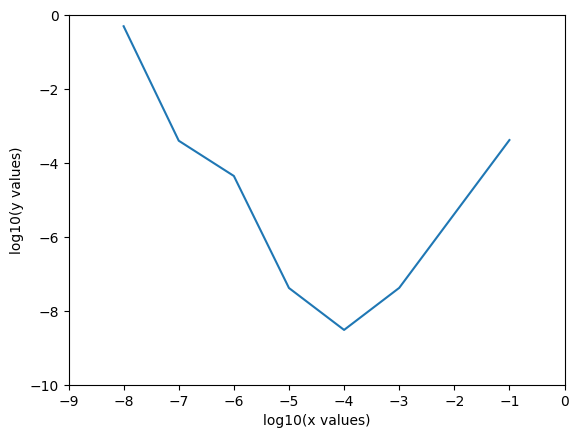

In [ ]:
import matplotlib.pyplot as plt

x_exp = np.arange(-8.0,0.0,1.0)
x_val = 10**x_exp
y_val = abs(f(x_val) - 0.5)
x_log10 = np.log10(x_val)
y_log10 = np.log10(y_val)

plt.plot(x_log10, y_log10)
plt.xlim([-9,0])
plt.ylim([-10,0])
plt.xlabel('log10(x values)')
plt.ylabel('log10(y values)')
plt.show

If we push to see the linear scale of x and y-axes, we can only see the spike to 0.5 at $x = 10^{-8}$ while seeing the rest of the forward error curve stick near zero

<function matplotlib.pyplot.show(close=None, block=None)>

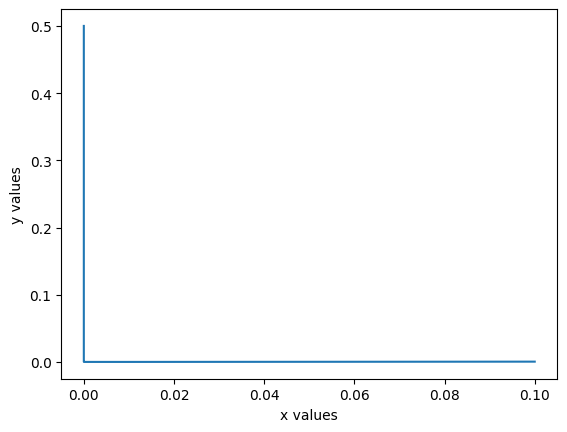

<Figure size 800x300 with 0 Axes>

In [ ]:

x_exp = np.arange(-8.0,0.0,1.0)
x_val = 10**x_exp
y_val = abs(f(x_val) - 0.5)
plt.plot(x_val, y_val)
plt.xlabel('x values')
plt.ylabel('y values')
plt.figure(figsize = (8,3))
plt.show

To see the behaviour of the forward error, it's best to see its behaviour at $x \in (10^{-8}, 0.1]$

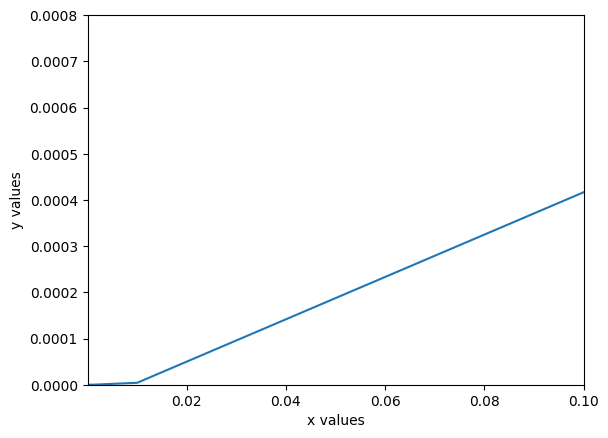

In [ ]:

x_exp = np.arange(-8.0,0.0,1.0)
x_val = 10**x_exp
y_val = abs(f(x_val) - 0.5)

plt.plot(x_val, y_val)
plt.xlim([1.00e-07,0.1])
plt.ylim([-1.00e-09,0.0008])
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In linear scale, as x decreases the forward error seems to approaches zero but then upon reaching $x = 10^{-8} $, the forward error spikes to 0.5

**(C)** Use the identity  $1 - \cos(x) = 2 \sin^{2} (\frac{x}{2})$ to compute $f(x) = \frac{2 \sin^{2} (\frac{x}{2})}{x^2}$

**Solution:**

In [ ]:
def g(x):
  g = (2*(np.sin(x/2))**2)/(x**2)
  return g

#returns values of f(x) for x = 10^-1, ..., 10^-8
for x in range(1,9):

  print(f"When x is {10**-x} then f(x) is {g(10**(-x))}")

When x is 0.1 then f(x) is 0.49958347219742333
When x is 0.01 then f(x) is 0.49999583334722214
When x is 0.001 then f(x) is 0.4999999583333347
When x is 0.0001 then f(x) is 0.4999999995833334
When x is 1e-05 then f(x) is 0.4999999999958333
When x is 1e-06 then f(x) is 0.4999999999999583
When x is 1e-07 then f(x) is 0.4999999999999996
When x is 1e-08 then f(x) is 0.5


We do the same forward error checking routine. By checking the forward error at logscale...

/tmp/ipython-input-1851504431.py:5: RuntimeWarning: divide by zero encountered in log10
  y_log10 = np.log10(y_val)


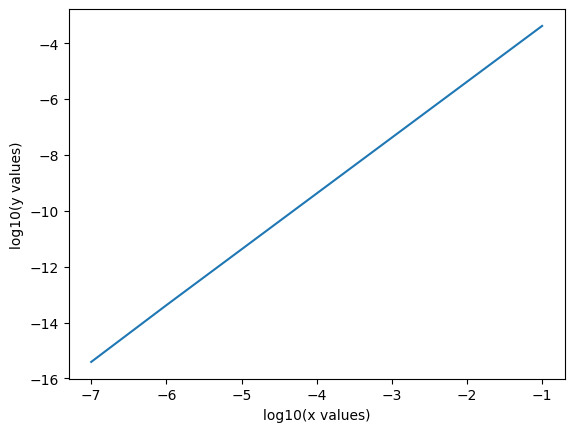

<Figure size 800x300 with 0 Axes>

In [ ]:
x_exp = np.arange(-8.0,0.0,1.0)
x_val = 10**x_exp
y_val = abs(g(x_val) - 0.5)
x_log10 = np.log10(x_val)
y_log10 = np.log10(y_val)

plt.plot(x_log10, y_log10)
plt.xlabel('log10(x values)')
plt.ylabel('log10(y values)')
plt.figure(figsize = (8,3))
plt.show()

On the linear scale

<function matplotlib.pyplot.show(close=None, block=None)>

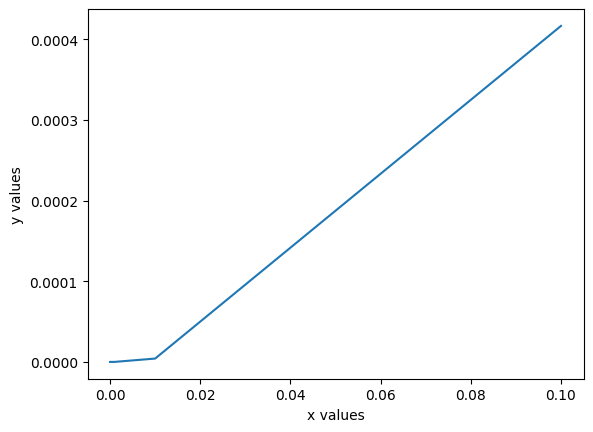

<Figure size 800x300 with 0 Axes>

In [ ]:

x_exp = np.arange(-8.0,0.0,1.0)
x_val = 10**x_exp
y_val = abs(g(x_val) - 0.5)

plt.plot(x_val, y_val)
plt.xlabel('x values')
plt.ylabel('y values')
plt.figure(figsize = (8,3))
plt.show

In both log and linear scale, the forward error clearly decreases. Both scale shows that the forward error becomes close to zero as x becomes much closer to zero

**Problem 3.** Consider the matrix

$$\begin{bmatrix}
2 & 1\\
1 & 3
\end{bmatrix}$$

**(a)** Recall that the induced $l_1- $norm is defined by
$$||A||_1 = \text{max}_{||v||_1\to 1}||Av||_1
$$

Show that $l_1- $unit ball in $\mathbb{R}^2$ is the diamond $\{(x,y)^{T} : |x| + |y| = 1 \}$

**Solution:** Since $||v||_1 = ||(x,y)^{T}||_1 = |x| + |y|$ and $v$ is a unit ball, then $||v||_1 = 1$. Therefore, $|x|+ |y| = 1 $

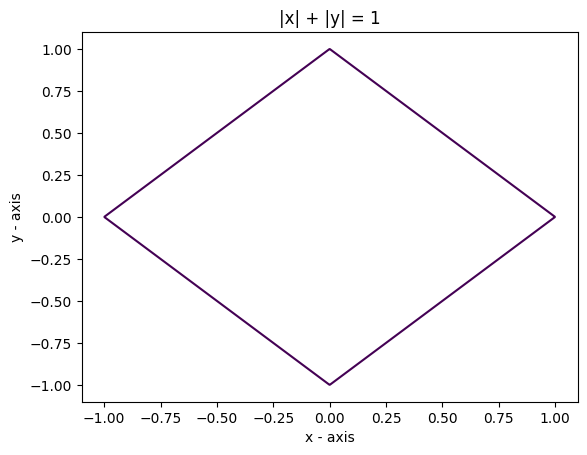

In [ ]:

x = np.linspace(-1.1, 1.1, 1000)
y = np.linspace(-1.1, 1.1, 1000)
xplot, yplot = np.meshgrid(x, y)
fxy = np.abs(xplot) + np.abs(yplot)

plt.title('|x| + |y| = 1')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.contour(xplot, yplot, fxy, levels=[1])
plt.show()

**(b)** Consider
$$
v(\theta) = \frac{1}{|\cos\theta|+|\sin\theta|}\begin{bmatrix}\cos\theta \\
\sin\theta
\end{bmatrix}
$$
with $\theta\in[0,2\pi]$. Show that $v(\theta)$ are unit vectors in $l_1$-norm

**Solution:** We have
$$
{\small
||v(\theta)||_1 = \frac{1}{|\cos\theta|+|\sin\theta|}(|\cos\theta|+|\sin\theta|) = 1
}
$$


Therefore, $||v(\theta)||_1 = 1$  which implies that $v(\theta)$ are unit vectors in $l_1$-norm

c) Write a program that samples unit vectors $v(\theta)$ for 1000 sample $\theta $ then compute $||Av(\theta)||_1 $ and estimate $||A||_1$

**Solution:**

In [ ]:
#creating a discretized sample space for which we can select 1000 samples
import random
x = np.linspace(0,2*np.pi,10000)

#sampling of 1000 samples without replacement in the sample space x that is generated
x_sample = np.random.choice(x,1000,replace=False)

In [ ]:

#checking the sample size
np.size(x_sample)

1000

In [ ]:

#array of sampled value of theta
x_sample

array([2.68947226e+00, 5.20865317e+00, 1.32399954e+00, 8.38260746e-01,
       3.70996360e+00, 5.81566957e+00, 9.42572053e-03, 3.52082081e+00,
       1.82670464e+00, 2.74602658e-01, 1.66018358e+00, 3.62199021e+00,
       3.57611837e+00, 1.43836495e+00, 4.71788732e+00, 5.91306868e-01,
       4.65002213e-01, 3.60125362e+00, 2.12769931e+00, 3.48186116e+00,
       1.50685852e+00, 4.99500350e+00, 3.56669265e+00, 3.80861948e+00,
       3.67603101e+00, 4.15862790e+00, 6.39063852e-01, 1.62687936e+00,
       5.25892368e+00, 7.11956091e-01, 3.31471172e+00, 6.88077599e-01,
       7.47773829e-02, 1.32776983e+00, 3.31156981e-01, 2.41675474e+00,
       3.84380883e+00, 2.43183590e+00, 1.21591795e+00, 5.78739241e+00,
       5.50964784e+00, 2.95841948e+00, 8.94186688e-01, 4.94221947e+00,
       2.88175696e+00, 2.61972193e+00, 5.81001414e+00, 1.52633834e+00,
       4.48789974e+00, 4.94159108e+00, 9.50112630e-01, 5.09931481e+00,
       1.06636318e+00, 5.93883232e+00, 3.28266427e+00, 2.92134498e+00,
      

In [ ]:
#Matrix A
A = np.array(
    [
        [2,1],
        [1,3]
    ]
)

#Matrix v
def v(x_value):
  v  = (1/(abs(np.cos(x_value)) + abs(np.sin(x_value))))
  Mat_v = np.array([[np.cos(x_value)],[np.sin(x_value)]])
  return np.dot(v,Mat_v)

In [ ]:

#Creating the list of norms of each Av
norm_Avi_list = []

for i in range(1000):
 x_value = x_sample[i]
 Av = np.linalg.matmul(A,v(x_value))
 norm_Avi = abs(Av[0]) + abs(Av[1])
 norm_Avi_list.append(norm_Avi[0])

In [ ]:
#Norm of each of |Av|i
norm_Avi_list

[np.float64(1.3269043379354195),
 np.float64(1.6487349439352001),
 np.float64(3.7987650245851663),
 np.float64(3.526455939209412),
 np.float64(3.3897499773734587),
 np.float64(1.335479537565123),
 np.float64(3.0093379798875075),
 np.float64(3.2849573725103225),
 np.float64(2.5483117714786867),
 np.float64(3.2197982072951405),
 np.float64(3.4242221308353695),
 np.float64(3.3425880532118386),
 np.float64(3.316991246618768),
 np.float64(3.882448162271093),
 np.float64(3.9617217222873884),
 np.float64(3.4017170890691695),
 np.float64(3.3340855518916723),
 np.float64(3.3311155757391253),
 np.float64(1.6162782981565915),
 np.float64(3.261468844217963),
 np.float64(3.939827476446617),
 np.float64(2.424728452488141),
 np.float64(3.311628349342741),
 np.float64(3.440536339579865),
 np.float64(3.371817719787345),
 np.float64(3.6179354290485057),
 np.float64(3.4263060712444777),
 np.float64(3.627897187951303),
 np.float64(1.6217562211525163),
 np.float64(3.463212799789107),
 np.float64(3.14884165

In [ ]:
print(f"The norm of |A| is estimated to be {max(norm_Avi_list)}")

The norm of |A| is estimated to be 3.9992151396170703


**(d)** Use subplots to visualize

(i) the $l_1$ unit ball with sampled vectors

(ii) the transformed set ${||Av(\theta)||}$

**Solution:**

(i) Plotting $v(\theta)$ from the 1000 sample $\theta$:

In [ ]:
def v(x_value):
  v  = (1/(abs(np.cos(x_value)) + abs(np.sin(x_value))))
  Mat_v = np.array([[np.cos(x_value)],[np.sin(x_value)]])
  return np.dot(v,Mat_v)

<function matplotlib.pyplot.show(close=None, block=None)>

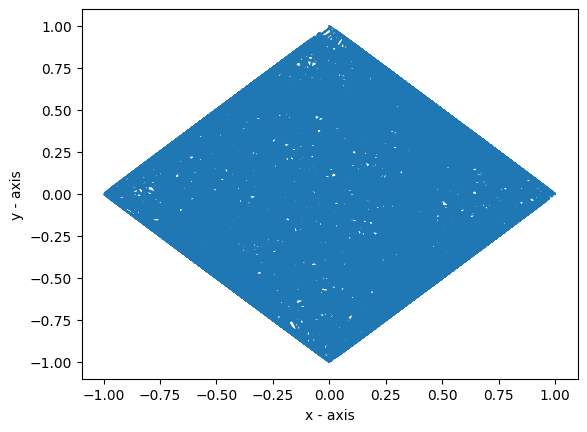

<Figure size 100x100 with 0 Axes>

In [ ]:

#Generating the values of x and y
x_v = []
y_v = []

for i in range(1000):
 x_v.append(v(x_sample[i])[0])
 y_v.append(v(x_sample[i])[1])

#Plotting (x_v,y_v)

plt.plot(x_v, y_v)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.figure(figsize = (1,1))
plt.show

(ii) Plotting $||Av(\theta)||$

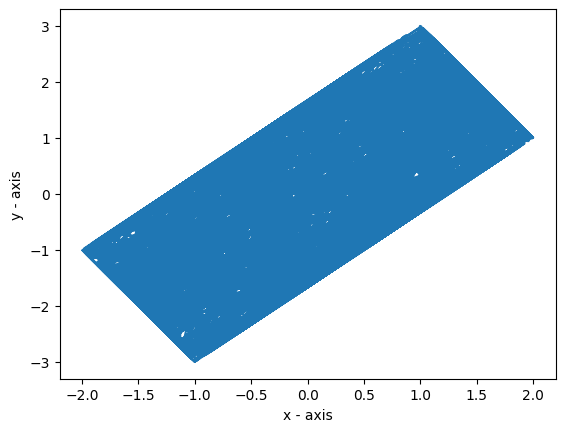

<Figure size 100x100 with 0 Axes>

In [ ]:

#Generating the values of x and y
x_av = []
y_av = []

for i in range(1000):
 x_value = x_sample[i]
 x_av.append(np.linalg.matmul(A,v(x_value))[0])
 y_av.append(np.linalg.matmul(A,v(x_value))[1])

#Plotting (x_av,y_av)
plt.plot(x_av, y_av)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.figure(figsize = (1,1))
plt.show()

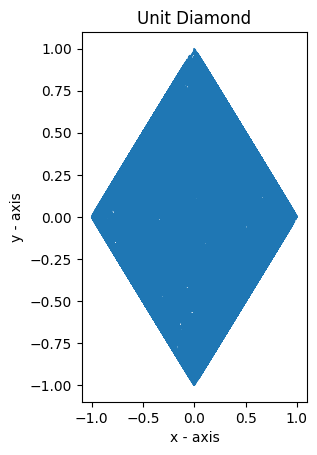

<Figure size 100x100 with 0 Axes>

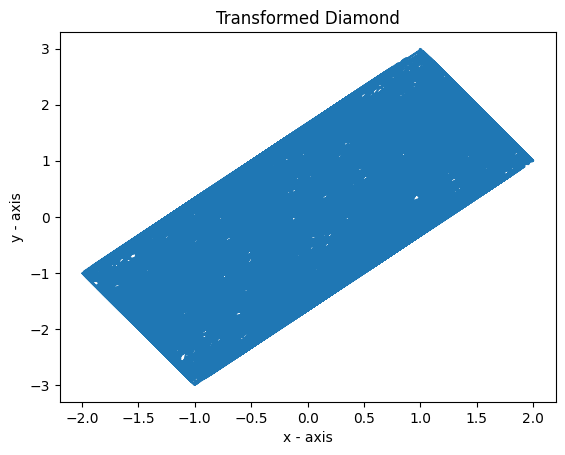

<Figure size 100x100 with 0 Axes>

In [ ]:
#Putting the two graphs into 1 plot
#Plotting (x_v,y_v)
plt.subplot(1,2,1)
plt.plot(x_v, y_v)
plt.title('Unit Diamond')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.figure(figsize = (1,1))
plt.show()

#Plotting (x_av,y_av)plt.subplot(1,2,2)
plt.plot(x_av, y_av)
plt.title('Transformed Diamond')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.figure(figsize = (1,1))
plt.show()

**(e)** Compare your estimate with the built - in $\texttt{norm(A,1)}$

**Solution:** The equivalent built-in command in python is $\texttt{numpy.linalg.norm(A,1)}$.

In [ ]:

#numpy.linalg.norm(A,1) as np.linalg.norm(A,1)
NormA_numpymethod = np.linalg.norm(A,1)

#Norm of A based from induced L1 norm
NormA_manualmethod = max(norm_Avi_list)

#error relative to numpy.linalg.norm()
rel_error = abs(NormA_numpymethod - NormA_manualmethod)/NormA_numpymethod

print(f"L1 Norm of A using numpy.linalg.norm() is {NormA_numpymethod}")
print(f"L1 Norm of A using induced L1 norm  is {NormA_manualmethod}")
print(f"The error of induced L1 norm relative to numpy.linalg.norm(): {100*rel_error}%")

L1 Norm of A using numpy.linalg.norm() is 4.0
L1 Norm of A using induced L1 norm  is 3.9992151396170703
The error of induced L1 norm relative to numpy.linalg.norm(): 0.019621509573242157%


The answer is approximately the same with the estimated value for $||Av(\theta)||_1$ in (c)

**Problem 4.** Consider the nonlinear equation
$$
f(x) = x^3 + x - 1 = 0.
$$

**(a)** Show that $f(x)$ has a unique root in the interval $(0,1)$.

**Solution:**
Observe that $f(0)=-1<0$ and $f(1)= 1 > 0$ and  $f(x)$ is continuous on the interval $(0,1)$. Intermediate value theorem from calculus guarantees us that there exist a real number $r$ between $0$ and $1$ such that $f(r) = 0$. Our next step is to show that $r$ must be unique.

By observing that $f'(x) = 3x^2 + 1$ and $f'(x) > 0$ for all $x>0$ and since our interval is $(0,1)$, we can comfortably say that at $x \in (0,1)$ our function $f(x)$ is strictly increasing (on the interval $(0,1)$). If $f(x)$ is strictly increasing on the interval $(0,1)$ then this implies that from $f(0) = -1 $ to $f(1) = 1$, there must be a unique real number $r$ such that $f(r)=0$

**(b)** Let
$$
g_1(x) = \frac{1}{1+x^2}, \qquad
g_2(x) = \frac{2}{1+x^2} - x.
$$

Verify that both $g_1$ and $g_2$ have the same fixed point corresponding to the root of $f(x)=0$.

**Solution:**

Suppose that the fixed point of $g_1(x)$ is $a$, then $ g_1(a) = a $ which means
$$
\frac{1}{1+a^2} = a
$$
or
$$
a^3 + a - 1 = 0
$$

Which implies that the fixed point $a$ of $g_1(a)$ corresponds to the roots of $f(x)=x^3 + x - 1$


If $b$ is the fixed point of $g_2(x)$ then $ g_2(b) = b $ which means

$$\frac{2}{1+b^2} - b = b$$Or$$
\frac{2}{1+b^2} = 2b
$$
or
$$
b^3 + b - 1 = 0
$$

Which implies that the fixed point $b$ of $g_1(b)$ corresponds to the roots of $f(x)=x^3 + x - 1$

Since both $g_1(x)$ and $g_2(x)$ reduces to the form $x^3 + x - 1 = 0$ then they must have the same fixed points corresponding to the roots of $f(x)=x^3 + x - 1$


**(c)** Prove that $g_1$ maps $[0,1]$ into itself and satisfies the contraction condition on $[0,1]$.  
Conclude, using the Banach Fixed-Point Theorem, that the iteration

$$
x_{n+1} = g_1(x_n)
$$

converges to the root of $f(x)=0$ for any initial guess $ x_0 \in [0,1] $.

**Solution:**

For $x \in [0,1]$, we check the range of $g_1(x)$.

Now, at $x=0$, $g_1(0) = \frac{1}{1+0^2} = \frac{1}{1+0}=1$

At $x=1$, $g_1(1) = \frac{1}{1+1^2} = \frac{1}{1+1}=\frac{1}{2} > 0$

This means that for $x \in [0,1]$, we have $g_1(x) \in [\frac{1}{2},1] \in [0,1]$

Hence $g_1$ maps $[0,1]$ into itself


From the contraction condition, we need to see if there exist a constant $c \in [0,1) $ such that
$$
||g(x) - g(y)|| \le c||x - y||
$$

Using this condition
$$
||g_1(1) - g_1(0)|| \le c||1 - 0||
$$
or
$$
||\frac{1}{2} - 1|| \le c||1 - 0||
$$
or
$$
c \ge \frac{1}{2}
$$
Since a constant $c$ exist ($c \in [\frac{1}{2}, 1)$), the mapping of $g_1$ from $[0,1]$ into itself satisfies the contraction condition on $[0,1]$.

Since the mapping of $g_1$ from $[0,1]$ into itself satisfies the contraction condition on $[0,1]$ (that is $g_1 : [0,1] \to [0,1]$ is a contraction on $[0,1]$) then from Banach fixed point theorem $g_1$ must have a unique fixed point $x_F \in [0,1]$ such that $g_1(x_F) = x_F$. That is, the Banach fixed point theorem gives us an assurance that the iteration
$$
x_{n+1} = g_1(x_n)
$$
Converges to the fixed point $g_1(x_F) = x_F$. And since $g_1(x) = \frac{1}{1+x^2}$ then at the fixed point $x = x_F$
$$
g_1(x_F) = \frac{1}{1+x_F^2} = x_F
$$
or
$$
 \frac{1}{1+x_F^2} = x_F
$$
Which can then be rearranged into
$$
x_F^3 + x_F - 1 = 0
$$
Which is equivalent to $f(x_F) = 0$. This means that $x_F$ is a root of $f(x)$.

Hence,the iteration
$$
x_{n+1} = g_1(x_n)
$$

converges to the root of $f(x)=0$ for any initial guess $ x_0 \in [0,1] $ (since $f(x)$ has a root within the interval $[0,1]$).

**(d)** Using numerical code, implement both fixed-point iterations starting from $x_0 = 0.5 $.  
Compute the first 10 iterations for each method and compare the behavior of $x_n $ under $g_1$ and $ g_2 $.  
Comment on the convergence or divergence observed in your results.

**Solution:**

In [ ]:
#defining functions
def g_1(x):
 g_1 = 1/(1+x**2)
 return g_1

def g_2(x):
 g_2 = 2/(1+x**2) - x
 return g_2

In [ ]:
#g_1 Fixed Point Iteration
#Initial guess of x
x_guess = 0.5
print(f"The value of x at iteration: 0 is {x_guess}")
#iteration
x_before=x_guess
for k in range(10):
  x_after = g_1(x_before)
  x_before = x_after
  print(f"The value of x at iteration: {k+1} is {x_after}")

The value of x at iteration: 0 is 0.5
The value of x at iteration: 1 is 0.8
The value of x at iteration: 2 is 0.6097560975609756
The value of x at iteration: 3 is 0.7289679098005204
The value of x at iteration: 4 is 0.6529997248077185
The value of x at iteration: 5 is 0.701061372973803
The value of x at iteration: 6 is 0.6704717958414473
The value of x at iteration: 7 is 0.6898776322492279
The value of x at iteration: 8 is 0.6775383809122035
The value of x at iteration: 9 is 0.6853735927163312
The value of x at iteration: 10 is 0.6803938569498902


The value of $x_n$ converges as the iteration progresses. In fact, $x_n$ converges to $0.682327803828019$ for large number of iterations

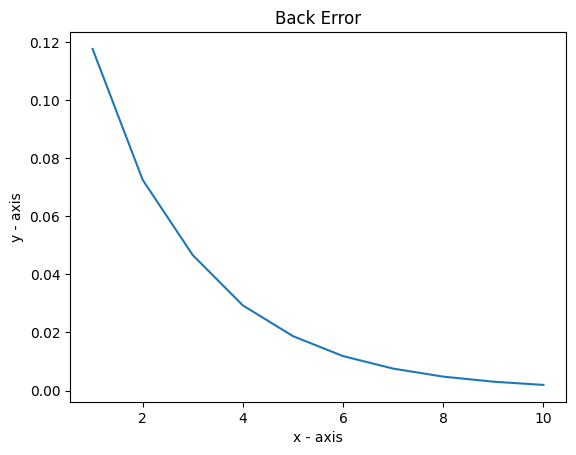

<Figure size 100x100 with 0 Axes>

In [ ]:
#Backward error for g_1
#Initial guess of x
x_guess = 0.5
x_true = 0.682327803828019
BackError = []
#iteration
x_before=x_guess
for k in range(10):
  x_after = g_1(x_before)
  x_before = x_after
  BackError.append(abs(x_after - x_true))

x_values = [k+1 for k in range(10)]
y_values = BackError

plt.plot(x_values, y_values)
plt.title('Back Error')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.figure(figsize = (1,1))
plt.show()

Back error for the iteration $x_{n+1} = g_1(x_n)$ clearly decreases and approaches zero as $n$ is increasing

In [ ]:
#g_2 Fixed Point Iteration
#Initial guess of x
x_guess = 0.5
print(f"The value of x at iteration: 0 is {x_guess}")
#iteration
x_before=x_guess
for k in range(10):
  x_after = g_2(x_before)
  x_before = x_after
  print(f"The value of x at iteration: {k+1} is {x_after}")

The value of x at iteration: 0 is 0.5
The value of x at iteration: 1 is 1.1
The value of x at iteration: 2 is -0.19502262443438922
The value of x at iteration: 3 is 2.121742114377013
The value of x at iteration: 4 is -1.75822403290972
The value of x at iteration: 5 is 2.24706002704008
The value of x at iteration: 6 is -1.916442100894652
The value of x at iteration: 7 is 2.344455553451011
The value of x at iteration: 8 is -2.0365961416643126
The value of x at iteration: 9 is 2.425117371729348
The value of x at iteration: 10 is -2.134470149387556


The value of $x_n$ oscillates and the iteration diverges. As iteration progresses, the magnitude of $x_n$ is increasing and does not converge.

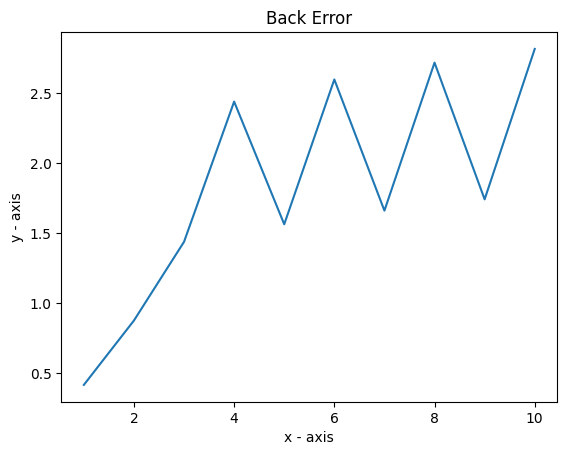

<Figure size 100x100 with 0 Axes>

In [ ]:
#Backward error for g_2
#Initial guess of x
x_guess = 0.5
x_true = 0.682327803828019
BackError = []
#iteration
x_before=x_guess
for k in range(10):
  x_after = g_2(x_before)
  x_before = x_after
  BackError.append(abs(x_after - x_true))

x_values = [k+1 for k in range(10)]
y_values = BackError

plt.plot(x_values, y_values)
plt.title('Back Error')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.figure(figsize = (1,1))
plt.show()

Clearly, the back error for the iteration for $x_{n+1} = g_2(x_n)$ is not increasing. In fact, the back error is increasing on an oscillating uptrend.